In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# numero di persone sottoposte al test
POPOL = 10000000
# caratteristiche del test
SENS = 0.97
SPEC = 0.97

In [3]:
# formule per calcolo componenti matrice di confusione
def calcola_conf_matrix(sens, spec, popol, prev):
    I = popol * prev        # infetti
    NI = popol * (1 - prev) # non infetti
    # converto ad int per arrotondare
    TP = sens * I
    TN = spec * NI
    FN = I - TP
    FP = NI - TN
    return (int(TP), int(TN), int(FP), int(FN))

In [4]:
# calcolo del Positive Predictive Value (PPV)
def calcola_ppv(sens, spec, popol, prev):
    I = popol * prev        # infetti
    NI = popol * (1 - prev) # non infetti
    # converto ad int per arrotondare
    TP = sens * I
    TN = spec * NI
    FP = NI - TN
    ppv = TP/(TP + FP)
    return ppv

In [16]:
# Lazio, prevalenza 3%
PREV = 0.03

tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, PREV)

tot_positivi = tp + fp

print("Con una prevalenza del %.2f" %(PREV))
print("In una popolazione di %d abitanti" %(POPOL))
print("Su %d tot positivi si avrebbero %d falsi positivi" %(tot_positivi, fp))

Con una prevalenza del 0.03
In una popolazione di 10000000 abitanti
Su 582000 tot positivi si avrebbero 291000 falsi positivi


In [17]:
# Lombardia, prevalenza 15%
PREV = 0.15

tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, PREV)

tot_positivi = tp + fp

print("Con una prevalenza del %.2f" %(PREV))
print("In una popolazione di %d abitanti" %(POPOL))
print("Su %d tot positivi si avrebbero %d falsi positivi" %(tot_positivi, fp))

Con una prevalenza del 0.15
In una popolazione di 10000000 abitanti
Su 1710000 tot positivi si avrebbero 255000 falsi positivi


In [7]:
# calcoli per grafico fp/tp in funzione di prev
vet_prev = np.arange(start=0.01, stop=0.9, step=0.01)

list_ratio = []

for x_prev in vet_prev:
    tp, tn, fp, fn = calcola_conf_matrix(SENS, SPEC, POPOL, x_prev)
    ratio = round(fp/tp, 3)
    list_ratio.append(ratio)

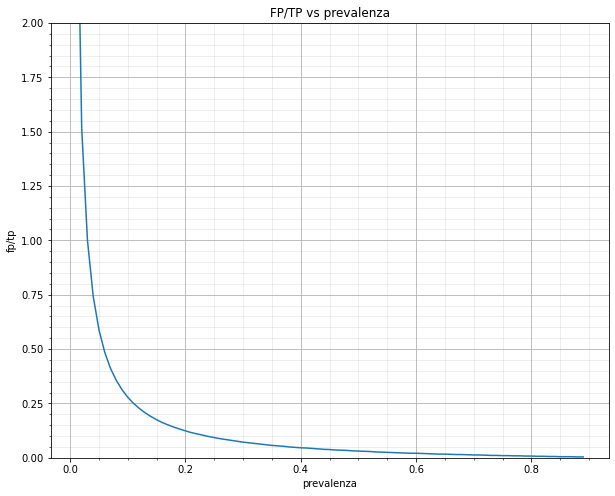

In [19]:
plt.figure(figsize=(10,8))
plt.title('FP/TP vs prevalenza')
plt.ylim(0, 2)
plt.plot(vet_prev, list_ratio)
plt.xlabel('prevalenza')
plt.ylabel('fp/tp')
plt.grid();
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2);

In [9]:
vet_prev = np.arange(start=0.01, stop=0.9, step=0.01)

list_ppv = []

for x_prev in vet_prev:
    ppv = calcola_ppv(SENS, SPEC, POPOL, x_prev)
    list_ppv.append(ppv)

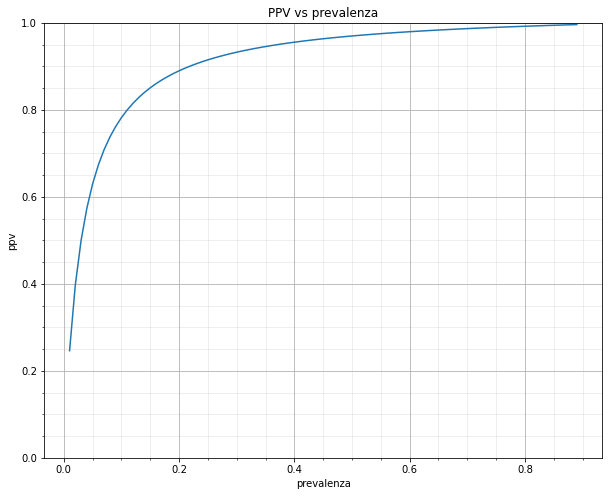

In [10]:
plt.figure(figsize=(10,8))
plt.title('PPV vs prevalenza')
plt.ylim(0, 1)
plt.plot(vet_prev, list_ppv)
plt.xlabel('prevalenza')
plt.ylabel('ppv')
plt.grid();
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2);